<a href="https://colab.research.google.com/github/zasminah/Python_MachineLearning/blob/main/MNIST_MNIST_EX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

MNIST = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = MNIST.load_data()

x_train.shape

(60000, 28, 28)

In [21]:
y_train.shape

(60000,)

In [22]:
x_test.shape

(10000, 28, 28)

In [23]:
y_test.shape

(10000,)

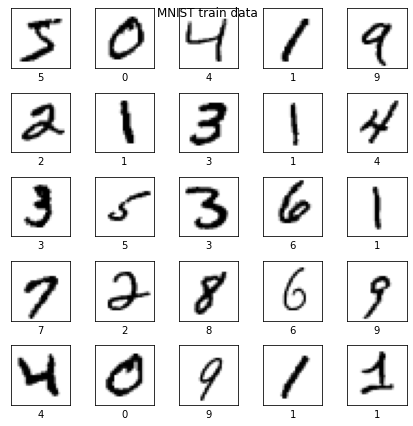

In [24]:
class_names = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize=(6,6))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.suptitle('MNIST train data')
plt.tight_layout()
plt.show()

In [25]:
# 28 X 28 = 784 ==> change two-dimensional array to 784 one-dimensional array by using reshape() 
# Each pixel is expressed as 0~255 depending on the brightness level.
# the number of total sample is x_train.shape[0] (60000)
# Model use 0 or 1 ==> divide 255 (normalization)
x_train = x_train.reshape(x_train.shape[0], 784).astype(float)/255 
x_test = x_test.reshape(x_test.shape[0], 784).astype(float)/255 

# For clarity, specify that the number of cases is 10
# One hot encoding 0~9
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)

In [27]:
model = Sequential()
# One image has 784 attributes ==> 784 Input node
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(256, activation='relu'))
# Multi-Classification uses softmax for activation function
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


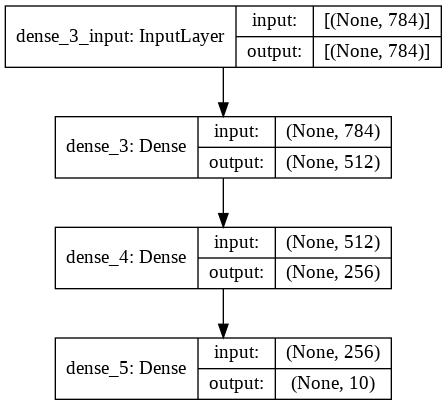

In [28]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [29]:
model.compile(loss='categorical_crossentropy', # loss function is cross entropy
              optimizer='adam',
              metrics=['accuracy'])

In [34]:

# verbose 0: silence
# verbose 1: progressbar
# verbose 2: oneline acc, loss

result = model.fit(x_train, y_train,
                   validation_split=0.3, # split data into train (70%) and validation (30%)- prevent overfitting
                   epochs=30,
                   batch_size=200,
                   verbose=2) #print mode

Epoch 1/30
210/210 - 3s - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.1135 - val_accuracy: 0.9788
Epoch 2/30
210/210 - 3s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.1193 - val_accuracy: 0.9786
Epoch 3/30
210/210 - 3s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.1191 - val_accuracy: 0.9788
Epoch 4/30
210/210 - 3s - loss: 5.3446e-04 - accuracy: 0.9999 - val_loss: 0.1132 - val_accuracy: 0.9805
Epoch 5/30
210/210 - 3s - loss: 1.6527e-04 - accuracy: 1.0000 - val_loss: 0.1123 - val_accuracy: 0.9808
Epoch 6/30
210/210 - 3s - loss: 4.5329e-05 - accuracy: 1.0000 - val_loss: 0.1140 - val_accuracy: 0.9808
Epoch 7/30
210/210 - 3s - loss: 3.5109e-05 - accuracy: 1.0000 - val_loss: 0.1150 - val_accuracy: 0.9810
Epoch 8/30
210/210 - 3s - loss: 2.9277e-05 - accuracy: 1.0000 - val_loss: 0.1161 - val_accuracy: 0.9812
Epoch 9/30
210/210 - 3s - loss: 2.5168e-05 - accuracy: 1.0000 - val_loss: 0.1172 - val_accuracy: 0.9813
Epoch 10/30
210/210 - 3s - loss: 2.1948e-05 - accuracy: 1.0000 - val_loss: 0

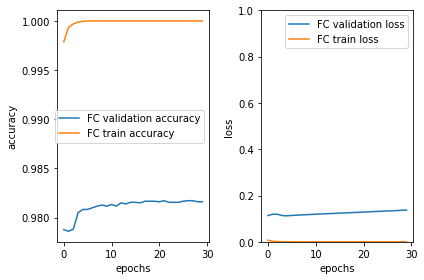

In [37]:
# Learning curve
plt.subplot(1, 2, 1)
plt.plot(np.arange((len(result.history['val_accuracy']))), result.history['val_accuracy'], label='FC validation accuracy')
plt.plot(np.arange((len(result.history['accuracy']))),result.history['accuracy'], label='FC train accuracy')
plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.subplot(1, 2, 2)
plt.plot(np.arange((len(result.history['val_loss']))), result.history['val_loss'], label='FC validation loss')
plt.plot(np.arange((len(result.history['loss']))), result.history['loss'], label='FC train loss')
plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.gca().set_ylim(0,1)
plt.tight_layout()
plt.show()

In [38]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1072 - accuracy: 0.9842


[0.10719156265258789, 0.9842000007629395]